## Data Analysis of home-pricing-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


### Data Wrangling (Gather)

In [2]:
# Load data into a dataframe 
df_total = pd.read_csv("train.csv", index_col = 'Id')
df_total.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Wrangling (Assess)

In [3]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
# colunas com muitas observações ausentes
missing_val = ['Alley', 'PoolQC', 'Fence', 'MiscFeature' ,'FireplaceQu']

df_total.drop(columns=missing_val, inplace=True)

In [5]:
# Check duplicated rows
print('There are {} duplicated observations.'.format(df_total.duplicated().sum()))

There are 0 duplicated observations.


> I'll select some features to analyze. They are:

* MSZoning: Identifies the general zoning classification of the sale.
* LotArea: Lot size in square feet
* Street: Type of road access to property
* Utilities: Type of utilities available
* Neighborhood: Physical locations within Ames city limits
* OverallQual: Rates the overall material and finish of the house
* OverallCond: Rates the overall condition of the house
* YearBuilt: Original construction date
* BsmtQual: Evaluates the height of the basement
* BsmtCond: Evaluates the general condition of the basement
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* GrLivArea: Above grade (ground) living area square feet
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
* KitchenAbvGr: Kitchens above grade
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* Fireplaces: Number of fireplaces
* GarageArea: Size of garage in square feet
* GarageCars: Size of garage in car capacity

In [6]:
# Select the columns to by analyzed:
investigate_columns = ['MSZoning', 'LotArea', 'Street', 'Utilities', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt',
                       'BsmtQual', 'BsmtCond', 'TotalBsmtSF','Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
                       '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 
                       'TotRmsAbvGrd', 'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'GarageArea', 'GarageCars', 'SalePrice']

df = df_total[investigate_columns].copy()
df.dropna(axis=0, inplace=True)

# Drop is not GrLivArea = 1stFlrSF+2ndFlrSF
df = df.loc[(df['1stFlrSF']+df['2ndFlrSF'] == df['GrLivArea']),:]

df.reset_index(drop=True, inplace=True)
df.index.name="Id"


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1397 non-null   object
 1   LotArea       1397 non-null   int64 
 2   Street        1397 non-null   object
 3   Utilities     1397 non-null   object
 4   Neighborhood  1397 non-null   object
 5   OverallQual   1397 non-null   int64 
 6   OverallCond   1397 non-null   int64 
 7   YearBuilt     1397 non-null   int64 
 8   BsmtQual      1397 non-null   object
 9   BsmtCond      1397 non-null   object
 10  TotalBsmtSF   1397 non-null   int64 
 11  Heating       1397 non-null   object
 12  HeatingQC     1397 non-null   object
 13  CentralAir    1397 non-null   object
 14  Electrical    1397 non-null   object
 15  1stFlrSF      1397 non-null   int64 
 16  2ndFlrSF      1397 non-null   int64 
 17  GrLivArea     1397 non-null   int64 
 18  FullBath      1397 non-null   int64 
 19  HalfBa

### What is the structure of the dataset?

There are 1433 entries and 28 columns. I'm most insterested to figure out how each feature contribute to the price of that houses.

### What is/are the main feature(s) of interest in your dataset?

All of that was selected.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Acredito que as features que contem informação com a área construída, ajudarão bastante na investigação.

## Univariate Exploration

Começarei esta etapa observado a principal variável de interesse: SalePrice.

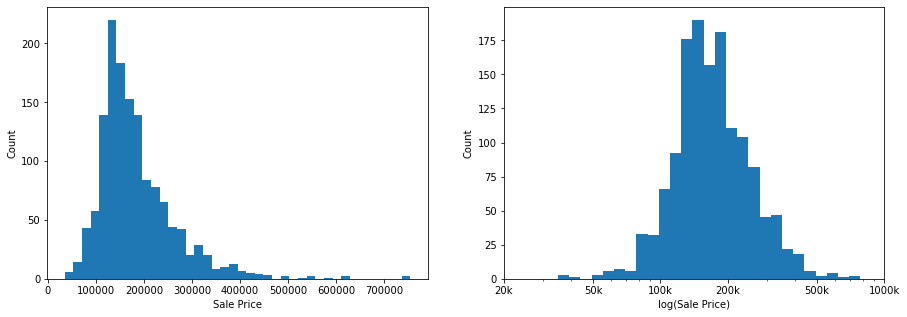

In [8]:
# Histogram log-scale
def logx_hist(x, bin_width):
    bin_edges = 10 ** np.arange(np.log10(x.min()), np.log10(x.max())+bin_width, bin_width)
    plt.hist(x, bins=bin_edges)
    plt.xscale('log')
    plt.ylabel('Count')

# Histogram of SalePrice feature
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(data=df, x='SalePrice', bins=40);
plt.xlabel('Sale Price');
plt.ylabel('Count');

# Histogram of SalePrice feature (log-scale)
plt.subplot(1,2,2)
logx_hist(df['SalePrice'], bin_width=0.05)
plt.xlabel('log(Sale Price)');
x_ticks = [20000, 50000, 100000, 200000, 500000, 1000000];
plt.xticks(x_ticks, ['20k', '50k', '100k', '200k', '500k', '1000k']);




* Imagem à esquerda: A distribuição do preço de venda é right-skewed, isto é, não é simétrica e possui a cauda à direita mais longa, enquanto a cauda da esquerda é muito mais estreita. Nesse caso, é interessante fazer uma transformação no eixo x para a escala logarítmica, como vemos na imagem à direita.
* Imagem à direita: Temos o histograma de log10(SalePrice), em que a distribuição é simétrica e vemos que a maior parte dos observações têm preço aproximadamente entre 100k e 300k.

### Explorando as variáveis relacionadas às areas
> Segue abaixo as distribuições de cada variável de área (LotArea', 1stFlrSF, 2ndFlrSF, TotalBsmtSF, GrLivArea, GarageArea).

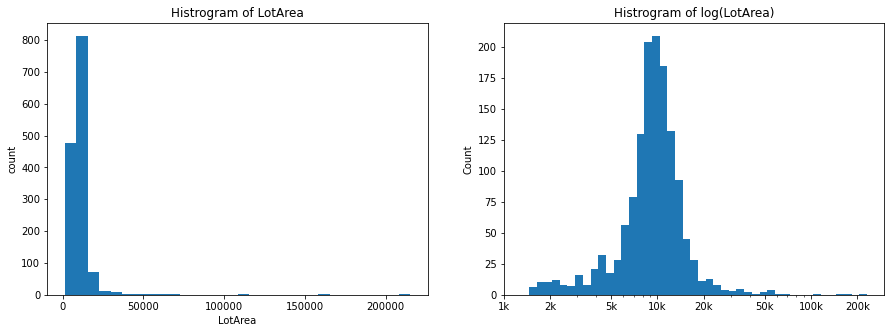

In [9]:
# Histogram of LotArea
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(data=df, x='LotArea', bins=30);
plt.xlabel('LotArea');
plt.ylabel('count');
plt.title('Histrogram of LotArea');

# Histogram of LotArea (Log-scale)

plt.subplot(1,2,2)
logx_hist(df['LotArea'], bin_width=0.05)
x_ticks = [1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5, 2e5];
plt.xticks(x_ticks, ['1k', '2k', '5k', '10k', '20k', '50k', '100k', '200k']);
plt.title('Histrogram of log(LotArea)');

* Para melhor representar o histograma, o eixo x foi transformado para a escala logarítmica e assim observamos uma distribuição próxima da normal, em que a maior parte dos valores estão na faixa entre 5k e 20k square-feet.

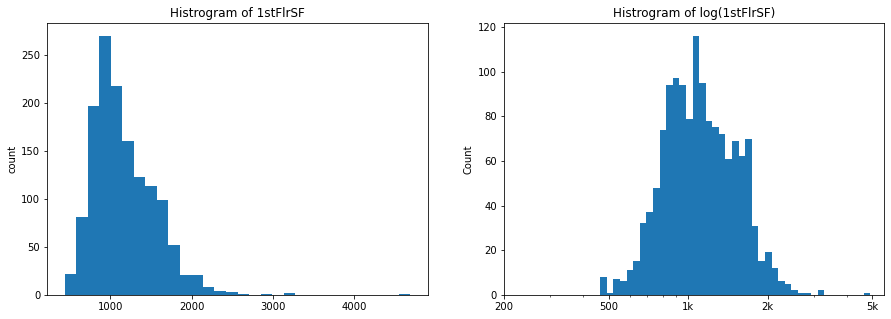

In [10]:
# Histogram of 1stFlrSF
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(data=df, x='1stFlrSF', bins=30);
plt.ylabel('count');
plt.title('Histrogram of 1stFlrSF');
#x_ticks = [2e2, 5e2, 1e3, 2e3, 5e3];
#plt.xticks(x_ticks, ['200', '500', '1k', '2k', '5k']);

# Histogram of 1stFlrSF (Log-scale)
plt.subplot(1,2,2)
logx_hist(df['1stFlrSF'], bin_width=0.025)
plt.title('Histrogram of log(1stFlrSF)');
x_ticks = [2e2, 5e2, 1e3, 2e3, 5e3];
plt.xticks(x_ticks, ['200', '500', '1k', '2k', '5k']);

* A distribuição de "1stFlrSF" é right-skewed, assim converti o eixo x à escala logarítmica e obtive a distribuição de "log(1stFlrSF)", que se aproxima de uma distribuição normal bimodal. A maior parte das observações tem "1stFlrSF" entre 800 e 1250 square-feet.

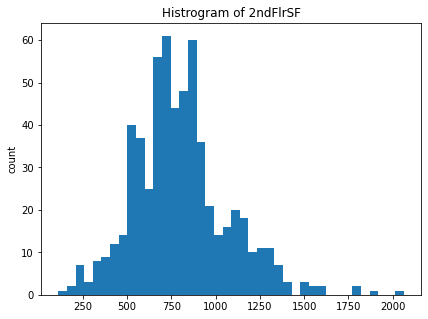

In [11]:
# Histogram of 2ndFlrSF 
aux = df[df['2ndFlrSF'] != 0] # desconsidera areas = 0 sf

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(aux['2ndFlrSF'], bins=40);
plt.ylabel('count');
plt.title('Histrogram of 2ndFlrSF');
#x_ticks = [2e2, 5e2, 1e3, 2e3, 5e3];
#plt.xticks(x_ticks, ['200', '500', '1k', '2k', '5k']);



* A distribuição de "2ndFlrSF" é mostrada para valores diferentes de zero. Assim, temos uma distribuição próxima à normal, em que a maior parte dos valores tem entre 500 e 1000 square-feet.

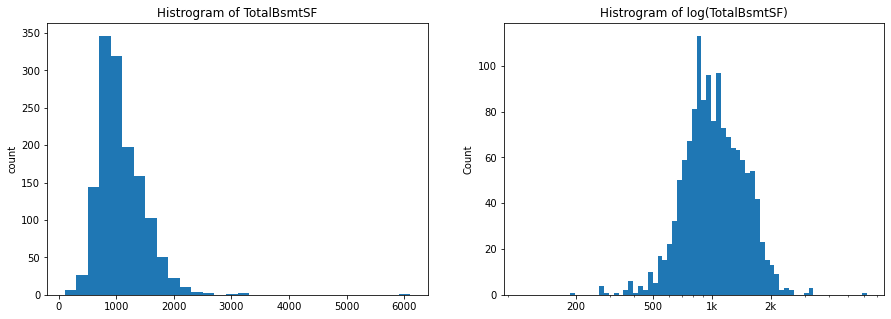

In [12]:
# Histogram of TotalBsmtSF   
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(data=df, x='TotalBsmtSF', bins=30);
plt.ylabel('count');
plt.title('Histrogram of TotalBsmtSF');

# Histogram of TotalBsmtSF (Log-scale)
aux = df[df['TotalBsmtSF'] != 0] # desconsidera a área = 0 sf
plt.subplot(1,2,2)
logx_hist(aux['TotalBsmtSF'], bin_width=0.025)
plt.title('Histrogram of log(TotalBsmtSF)');
x_ticks = [2e2, 5e2, 1e3, 2e3];
plt.xticks(x_ticks, ['200', '500', '1k', '2k']);



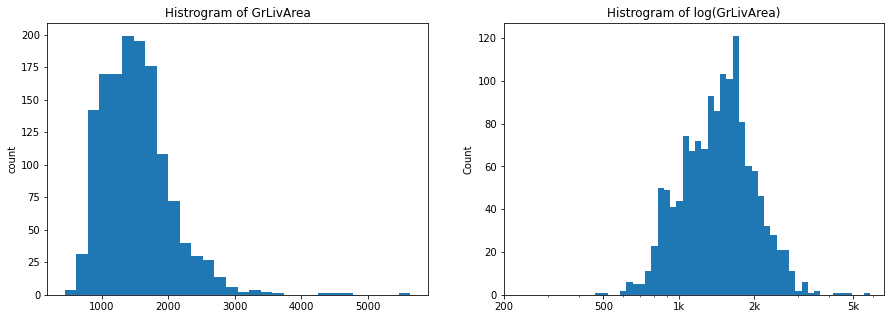

In [13]:
# Histogram of GrLivArea     
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(data=df, x='GrLivArea', bins=30);
plt.ylabel('count');
plt.title('Histrogram of GrLivArea');

# Histogram of GrLivArea (log-scale)    

plt.subplot(1,2,2)
logx_hist(df['GrLivArea'], bin_width=0.025)
plt.title('Histrogram of log(GrLivArea)');
x_ticks = [2e2, 5e2, 1e3, 2e3, 5e3];
plt.xticks(x_ticks, ['200', '500', '1k', '2k', '5k']);



* A distribuição de "GrLivArea" mostra que a maior parte das casas tem entre 1000 e 2000 square-foot de "ground living area".

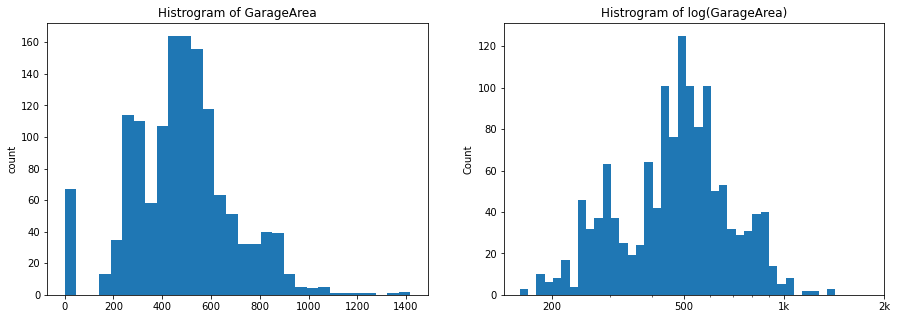

In [14]:
# Histogram of GarageArea
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(data=df, x='GarageArea', bins=30);
plt.ylabel('count');
plt.title('Histrogram of GarageArea');

# Histogram of GarageArea (log-scale)
aux = df.query('GarageArea != 0')
plt.subplot(1,2,2)
logx_hist(aux['GarageArea'], bin_width=0.025)
plt.title('Histrogram of log(GarageArea)');
x_ticks = [2e2, 5e2, 1e3, 2e3];
plt.xticks(x_ticks, ['200', '500', '1k', '2k']);

    

* O histograma da variável na escala logarítmica mostra uma distribuição multimodal, com picos em torno de 300, 500 e 800 square-foot, que podem corresponder aos espaços para um, dois e três automóveis, respectivamente.

### Explore discrete quantitative features
> Segue abaixo as distribuições de cada variável discreta (OverallQual, OverallCond,BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars)

In [15]:
discrete_vars = ['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']

In [16]:
def discrete_hist(x):
    "Plota o histograma de uma variável discreta"
    bin_edges = np.arange(x.min()-0.5, x.max()+0.5+1, 1)
    plt.hist(x, rwidth=0.7, bins = bin_edges)
    plt.xticks(np.arange(x.min(), x.max()+1, 1))
    plt.ylabel('Count')

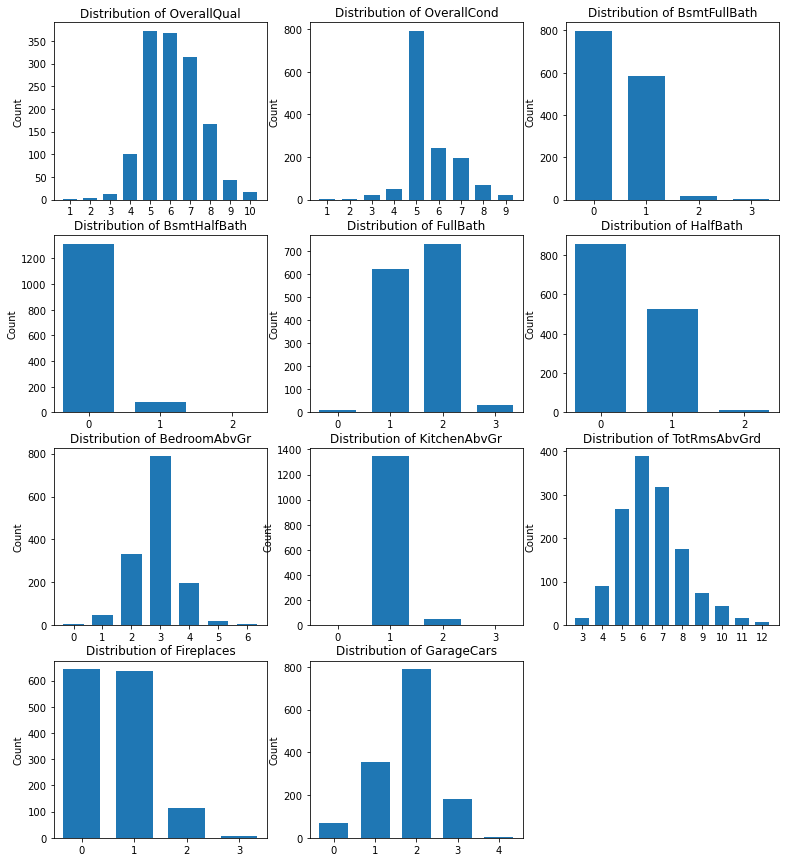

In [17]:
# OverallQual
plt.figure(figsize=(13,15))
plt.subplot(4,3,1)
discrete_hist(df['OverallQual']);
plt.title('Distribution of OverallQual');

# OverallCond
plt.subplot(4,3,2)
discrete_hist(df['OverallCond']);
plt.title('Distribution of OverallCond');

# BsmtFullBath
plt.subplot(4,3,3)
discrete_hist(df['BsmtFullBath']);
plt.title('Distribution of BsmtFullBath');

# BsmtHalfBath
plt.subplot(4,3,4)
discrete_hist(df['BsmtHalfBath']);
plt.title('Distribution of BsmtHalfBath');

# FullBath
plt.subplot(4,3,5)
discrete_hist(df['FullBath']);
plt.title('Distribution of FullBath');

# HalfBath
plt.subplot(4,3,6)
discrete_hist(df['HalfBath']);
plt.title('Distribution of HalfBath');

# BedroomAbvGrd
plt.subplot(4,3,7)
discrete_hist(df['BedroomAbvGr']);
plt.title('Distribution of BedroomAbvGr');

# KitchenAbvGrd
plt.subplot(4,3,8)
discrete_hist(df['KitchenAbvGr']);
plt.title('Distribution of KitchenAbvGr');

# TotRmsAbvGrd
plt.subplot(4,3,9)
discrete_hist(df['TotRmsAbvGrd']);
plt.title('Distribution of TotRmsAbvGrd');

# Fireplaces
plt.subplot(4,3,10)
discrete_hist(df['Fireplaces']);
plt.title('Distribution of Fireplaces');

# GarageCars
plt.subplot(4,3,11)
discrete_hist(df['GarageCars']);
plt.title('Distribution of GarageCars');

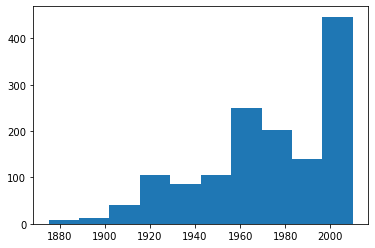

In [18]:
# YearBuilt
plt.hist(data=df, x='YearBuilt', bins=10);

### Explore categoric variables

In [19]:
# Categorical Variables
cat_var = ['MSZoning', 'Street', 'Utilities', 'Neighborhood', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
           'BsmtQual', 'BsmtCond', 'KitchenQual']


# Convert to Ordinal variables
cat_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ordinal_cat = pd.api.types.CategoricalDtype(categories=cat_order, ordered=True)
df[['BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual']] = df[['BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual']].astype(ordinal_cat, 
                                                                                                                          copy=True)
def nominal_barplot(x):
    "Bar plot de uma variável nominal."
    base_color = sns.color_palette()[3]
    cat_order = x.value_counts().index
    sns.countplot(x, color=base_color, order=cat_order)

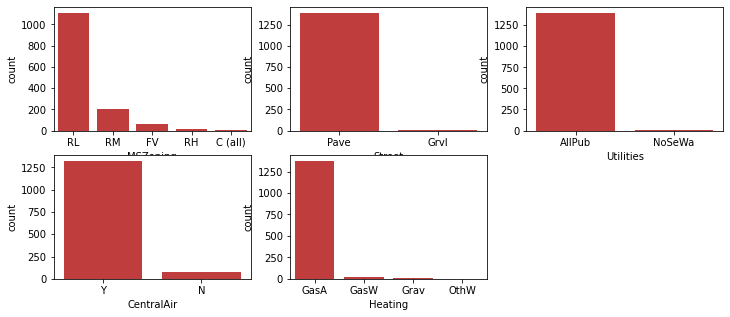

In [20]:
# Bar plot of nominal variables
plt.figure(figsize=(12,5))

plt.subplot(2,3,1)
nominal_barplot(df['MSZoning'])

plt.subplot(2,3,2)
nominal_barplot(df['Street'])

plt.subplot(2,3,3)
nominal_barplot(df['Utilities'])


plt.subplot(2,3,4)
nominal_barplot(df['CentralAir'])

plt.subplot(2,3,5)
nominal_barplot(df['Heating'])

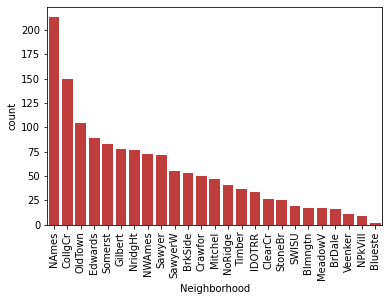

In [21]:
nominal_barplot(df['Neighborhood']);
plt.xticks(rotation=90);

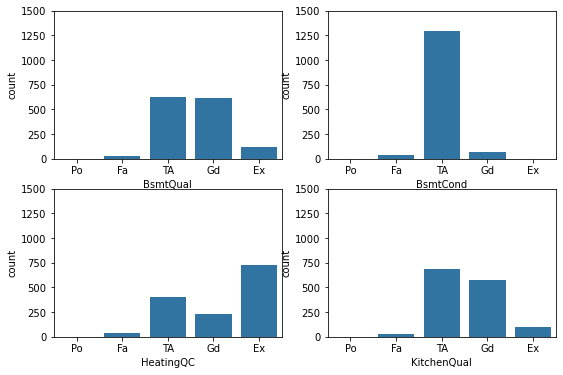

In [22]:
plt.figure(figsize=[9,6]);
base_color = sns.color_palette()[0]

count = 1
for col in ['BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual']:
    plt.subplot(2,2,count)
    sns.countplot(df[col], color=base_color);
    plt.ylim([0, 1500]);
    count = count +1


#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Não foram encontrados pontos incomumns Em quase todas as visualizações foi preciso usar a escala logarítmica, porque os valores de área (em square-foot) têm uma faixa de valores larga.

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Ainda não!

## Bivariate Exploration

Vamos analisar a correlação entre as variáveis anteriores e o preço da casa. Para isso, partiremos inicialmente de um plot-matrix!

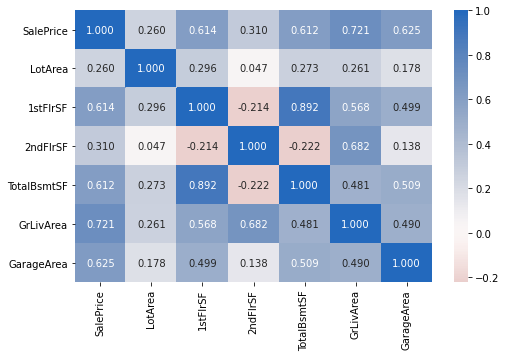

In [23]:
num_vars = ['SalePrice','LotArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']
# correlation plot
plt.figure(figsize=(8,5))
sns.heatmap(df[num_vars].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0);

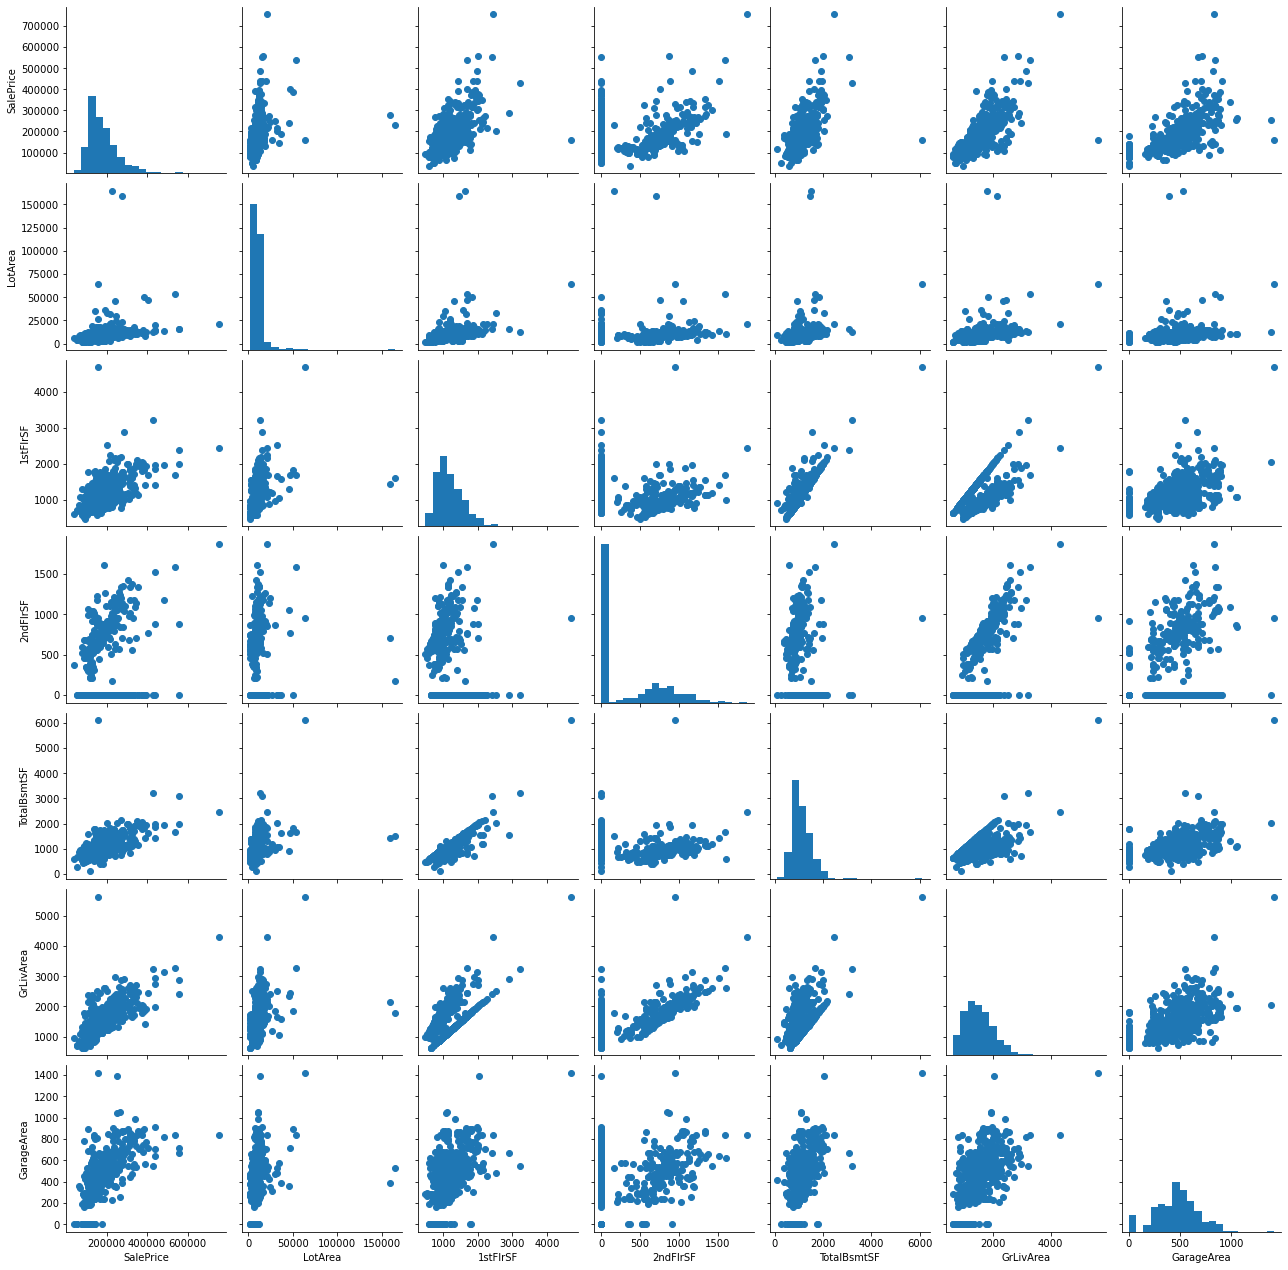

In [24]:
# plot matrix: sample 500 observations so that are cleaner and
# they render faster
samples = np.random.choice(df.shape[0], 500, replace=False)
df_samp = df.loc[samples,:]

g = sns.PairGrid(data=df_samp, vars=num_vars);
g.map_diag(plt.hist, bins=20);
g.map_offdiag(plt.scatter);

* Correlação forte $(0,7 \leq |r| < 1)$:

> * SalePrice vs GrLivArea (0.72)
> * 1stFlrSF vs TotalBsmtSF (0.824) (as distribuições dessas variáveis são semelhantes/ a área do basement tá relacionada com a área do térreo) 

* Correlação moderada $(0,3 \leq |r| < 0,7)$:

>* SalePrice vs GarageArea (0.626) /TotalBsmtSF (0.617) /1stFlrSF (0.606)
> * GrLivArea vs 2ndFlrSF (0.681) / 1stFlrSF (0.57) 

*OBS: Embora TotalBsmtSF (0.497) e GarageArea (0.492) tenha apresentada coeficiente de correlação com GrLivArea moderado, ambas as variáveis são independentes de GrLivArea.*



In [25]:
#np.log10(df['LotArea']).corr((df['SalePrice']))

In [26]:
# Create a bool variable 'second_floor' 
df['second_floor'] = df['2ndFlrSF'].astype('bool')

In [27]:
def discrete_hist2d(x, y):
    "Plota o histograma 2d de duas variáveis discretas."
    bin_x = np.arange(x.min()-0.5, x.max()+0.5+1, 1)
    bin_y = 20
    plt.hist2d(x, y, bins = [bin_x, bin_y], cmin=0.5, cmap='viridis_r')
    plt.xticks(np.arange(x.min(), x.max()+1, 1))
    plt.colorbar()

In [28]:
# OverallQual
#plt.figure(figsize=(14,16))
#plt.subplot(4,3,1)
#discrete_hist2d(df['OverallQual'], df['SalePrice']);
#plt.title('SalePrice vs OverallQual');

# OverallCond
#plt.subplot(4,3,2)
#discrete_hist2d(df['OverallCond'], df['SalePrice']);
#plt.title('SalePrice vs OverallCond');

# BsmtFullBath
#plt.subplot(4,3,3)
#discrete_hist2d(df['BsmtFullBath'], df['SalePrice']);
#plt.title('SalePrice vs BsmtFullBath');

# BsmtHalfBath
#plt.subplot(4,3,4)
#discrete_hist2d(df['BsmtHalfBath'], df['SalePrice']);
#plt.title('SalePrice vs BsmtHalfBath');

# FullBath
#plt.subplot(4,3,5)
#discrete_hist2d(df['FullBath'], df['SalePrice']);
#plt.title('SalePrice vs FullBath');

# HalfBath
#plt.subplot(4,3,6)
#discrete_hist2d(df['HalfBath'], df['SalePrice']);
#plt.title('SalePrice vs HalfBath');

# BedroomAbvGrd
#plt.subplot(4,3,7)
#discrete_hist2d(df['BedroomAbvGr'], df['SalePrice']);
#plt.title('SalePrice vs BedroomAbvGr');

# KitchenAbvGrd
#plt.subplot(4,3,8)
#discrete_hist2d(df['KitchenAbvGr'], df['SalePrice']);
#plt.title('SalePrice vs KitchenAbvGr');

# TotRmsAbvGrd
#plt.subplot(4,3,9)
#discrete_hist2d(df['TotRmsAbvGrd'], df['SalePrice']);
#plt.title('SalePrice vs TotRmsAbvGrd');

# Fireplaces
#plt.subplot(4,3,10)
#discrete_hist2d(df['Fireplaces'], df['SalePrice']);
#plt.title('SalePrice vs Fireplaces');

# GarageCars
#plt.subplot(4,3,11)
#discrete_hist2d(df['GarageCars'], df['SalePrice']);
#plt.title('SalePrice vs GarageCars');

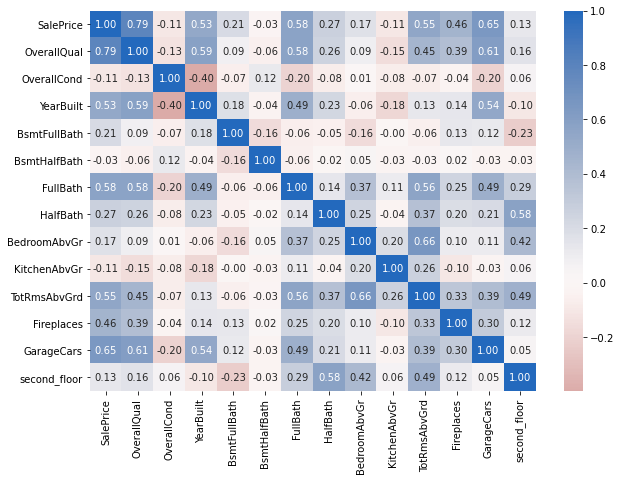

In [29]:
## Variaveis discretas
discrete_vars = ['SalePrice','OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'second_floor']
# correlation plot
plt.figure(figsize=(10,7))
sns.heatmap(df[discrete_vars].corr(), annot=True, fmt='.2f', cmap='vlag_r', center=0);



* Correlação forte $(0,7 \leq |r| < 1)$:

> * SalePrice vs OverallQual (0.79)

* Correlação moderada $(0,3 \leq |r| < 0,7)$:

>* SalePrice vs  GarageCars (0.64) /  FullBath (0.56) / TotRmsAbvGrd (0.53) / YearBuilt (0.52) / Fireplaces (0.47) 

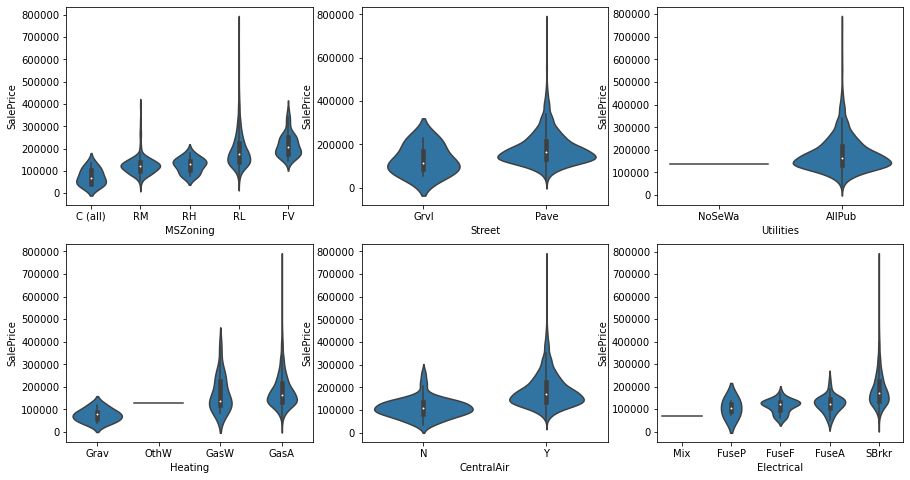

In [30]:
# nominal categorical variables

plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.violinplot(data=df, x='MSZoning', y='SalePrice', order=df.groupby('MSZoning').median().SalePrice.sort_values().index, color=base_color);

plt.subplot(2,3,2)
sns.violinplot(data=df, x='Street', y='SalePrice', order=df.groupby('Street').median().SalePrice.sort_values().index, color=base_color);

plt.subplot(2,3,3)
sns.violinplot(data=df, x='Utilities', y='SalePrice', order=df.groupby('Utilities').median().SalePrice.sort_values().index, color=base_color);

plt.subplot(2,3,4)
sns.violinplot(data=df, x='Heating', y='SalePrice', order=df.groupby('Heating').median().SalePrice.sort_values().index, color=base_color);

plt.subplot(2,3,5)
sns.violinplot(data=df, x='CentralAir', y='SalePrice', order=df.groupby('CentralAir').median().SalePrice.sort_values().index, color=base_color);

plt.subplot(2,3,6)
sns.violinplot(data=df, x='Electrical', y='SalePrice', order=df.groupby('Electrical').median().SalePrice.sort_values().index, color=base_color);


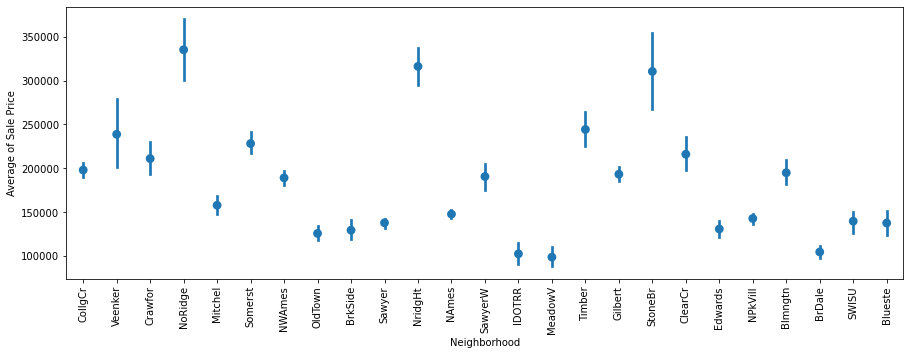

In [31]:
plt.figure(figsize=(15,5))
sns.pointplot(data=df, x='Neighborhood', y='SalePrice', color=base_color, linestyles='');
plt.xticks(rotation=90);
plt.ylabel('Average of Sale Price');


* Bairros com médias de preço maiores: NoRidge, StoneBr, NridHt, Timber, Veenker.

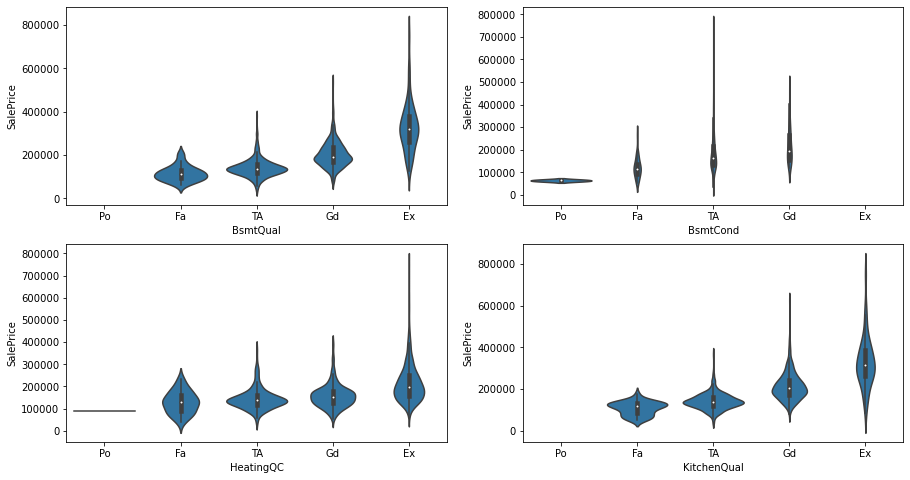

In [32]:
# ordinal categorical variables

plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.violinplot(data=df, x='BsmtQual', y='SalePrice', color=base_color);

plt.subplot(2,2,2)
sns.violinplot(data=df, x='BsmtCond', y='SalePrice', color=base_color);

plt.subplot(2,2,3)
sns.violinplot(data=df, x='HeatingQC', y='SalePrice', color=base_color);

plt.subplot(2,2,4)
sns.violinplot(data=df, x='KitchenQual', y='SalePrice', color=base_color);

## Mutivariate Exploration

SalePrice vs:

* numerical variables: GrLivArea/GarageArea
* discrete variables: OverallQual/GarageCars/FullBath/TotRmsAbvGrd/YearBuilt/Fireplaces


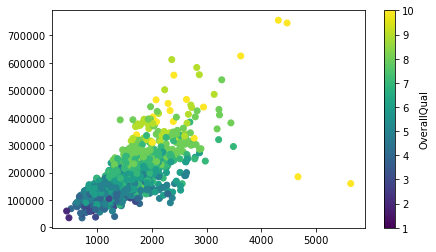

In [33]:
# SalePrice across GrLivArea and OverallQual
plt.figure(figsize=(7,4));
plt.scatter(data=df, x='GrLivArea', y='SalePrice', c='OverallQual');
plt.colorbar().set_label('OverallQual');

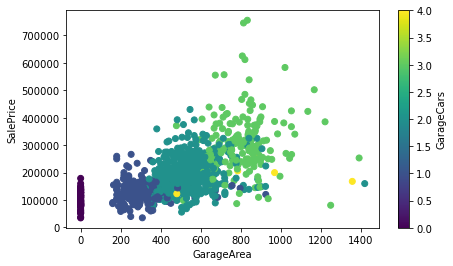

In [34]:
# SalePrice across GarageArea and GarageCars
plt.figure(figsize=(7,4));
plt.scatter(data=df, x='GarageArea', y='SalePrice', c='GarageCars');
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.colorbar().set_label('GarageCars')

* A variável GarageArea está diretalmente relacionada com GarageCars

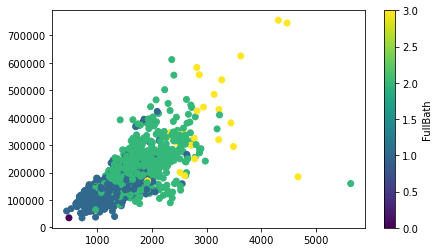

In [35]:
# SalePrice across GrLivArea and FullBath
plt.figure(figsize=(7,4));
plt.scatter(data=df, x='GrLivArea', y='SalePrice', c='FullBath');
plt.colorbar().set_label('FullBath');

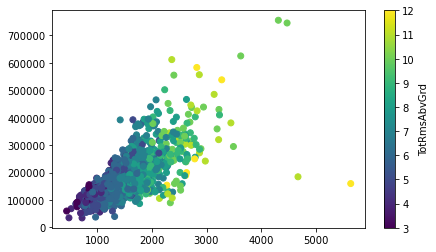

In [36]:
# SalePrice across GrLivArea and TotRmsAbvGrd
plt.figure(figsize=(7,4));
plt.scatter(data=df, x='GrLivArea', y='SalePrice', c='TotRmsAbvGrd');
plt.colorbar().set_label('TotRmsAbvGrd');

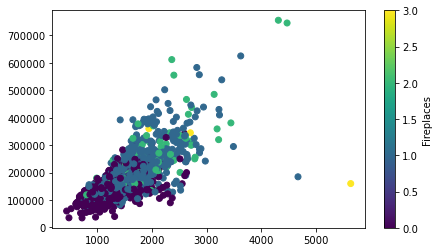

In [40]:
# SalePrice across GrLivArea and Fireplaces
plt.figure(figsize=(7,4));
plt.scatter(data=df, x='GrLivArea', y='SalePrice', c='Fireplaces');
plt.colorbar().set_label('Fireplaces');

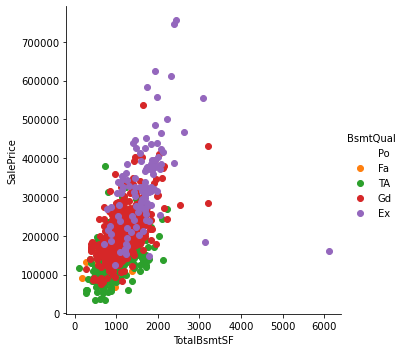

In [44]:
# SalePrice across TotalBsmtSF and BsmtQual

g = sns.FacetGrid(data=df, hue='BsmtQual', height=5);
g.map(plt.scatter, 'TotalBsmtSF', 'SalePrice');
g.add_legend();

c:\users\thiago senra\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


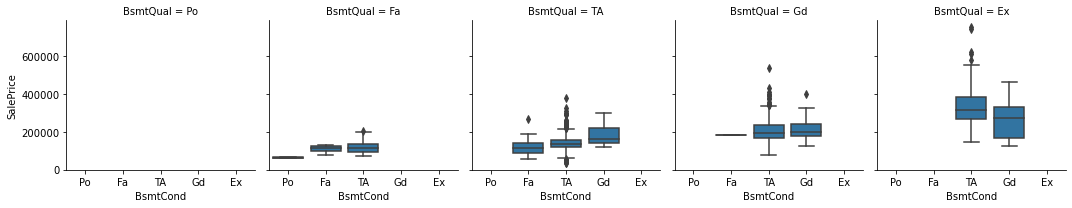

In [58]:
# SalePrice across BsmtQual and BsmtCond
g = sns.FacetGrid(data=df, col='BsmtQual', col_wrap=3)
g.map(sns.boxplot, 'BsmtCond', 'SalePrice')

c:\users\thiago senra\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


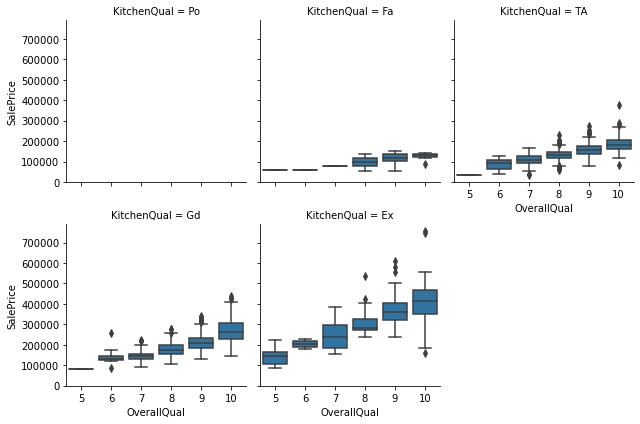

In [64]:
# SalePrice across KitchenQual and OverallQual
g = sns.FacetGrid(data=df, col='KitchenQual', col_wrap=3)
g.map(sns.boxplot, 'OverallQual', 'SalePrice')

c:\users\thiago senra\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


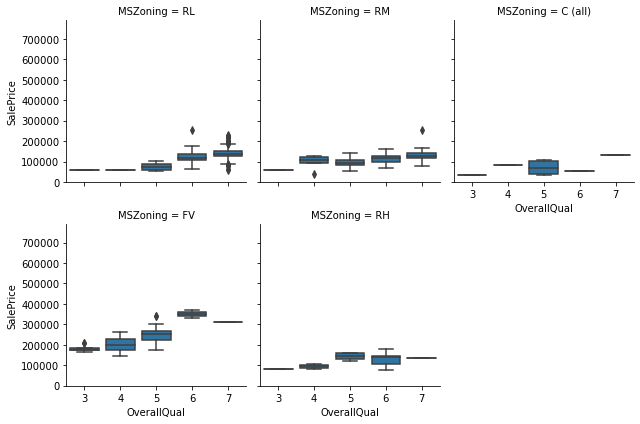

In [63]:
# SalePrice across OverallQual and Neighboorh/MSZonning
g = sns.FacetGrid(data=df, col="MSZoning", col_wrap=3)
g.map(sns.boxplot, 'OverallQual', 'SalePrice')